In [1]:
import sys

import pandas as pd
import mne
from mne.time_frequency import tfr_morlet, psd_multitaper
import h5py

from os import listdir
from os.path import isfile, join
import re
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib notebook
pfad = '/Users/Ajit/Documents/_Privat/TU Master/Module/Introduction to Physiological Computing/Neuro-Usability Project/emotional_classifier-master'
sys.path.append(pfad)
from src.utils import ensure_dir

In [2]:
import pickle
data_folder = pfad + "/data/"
events_plot_folder = data_folder+"plots/events/"
single_trial_folder = data_folder+"plots/single_trials/"
complete_plot_folder = data_folder+"plots/complete_exp/"
test_plots_folder = data_folder +"plots/test/"
ensure_dir(events_plot_folder)
ensure_dir(single_trial_folder)
ensure_dir(complete_plot_folder)
ensure_dir(test_plots_folder)
csv_data_path = data_folder+"csv/{}.csv"
channel_names = ['F3', 'FZ', 'F4', 'C3', 'CZ', 'C4', 'P3', 'PZ','P4']
event_labels = ['beat', 'brook', 'nat']
labeled_data = pickle.load(open(data_folder+"labeled_data.pkl", "rb"))
sfreq = 512

In [88]:
raw = labeled_data['beat'][11][0]
raw = raw.set_eeg_reference('average', projection=True)
raw.apply_proj()


Projections have already been applied. Setting proj attribute to True.


<ipython-input-88-e775f712eed9>:2: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  raw = raw.set_eeg_reference('average', projection=True)


<RawArray  |  None, n_channels x n_times : 9 x 36864 (72.0 sec), ~2.6 MB, data loaded>

In [143]:
len(labeled_data['brook'])

24

In [93]:
psds, freqs = psd_multitaper(raw, fmin=2., fmax=40.)
psds = 10. * np.log10(psds)
plt.plot(freqs,psds.mean(0))

    Using multitaper spectrum estimation with 7 DPSS windows


In [132]:
low = np.argwhere(freqs==2)[0][0]
high = np.argwhere(freqs==8)[0][0]
psd_bands = psds[:,low:high].mean(1)

In [133]:
low = np.argwhere(freqs==8)[0][0]
high = np.argwhere(freqs==13)[0][0]
a = np.vstack((psd_bands, psds[:,low:high].mean(1), psds[:,low:high].mean(1)))


In [135]:
a.shape

(3, 9)

In [3]:
def create_avgpowers(raw):
    #calculate power spectral density
    raw = raw.set_eeg_reference('average', projection=True)
    raw.apply_proj()
    psds, freqs = psd_multitaper(raw, fmin=2., fmax=40.)
    psds = 10. * np.log10(psds)

    # get limits
    Hz_8 = np.argwhere(np.floor(freqs)==8.)[0][0]
    Hz_13 = np.argwhere(np.floor(freqs)==13.)[0][0]
    Hz_30 = np.argwhere(np.floor(freqs)==30.)[0][0]
    
    # theta 2-8 Hz
    theta = psds[:, :Hz_8].mean(1)
    # alpha 8-13 Hz
    alpha = psds[:, Hz_8:Hz_13].mean(1)
    # beta 13-30 Hz
    beta = psds[:, Hz_13:Hz_30].mean(1)
    # gamma 30-40 Hz
    gamma = psds[:, Hz_30:].mean(1)
    
    # returns matrix: channels x frequency bands(theta, alpha, beta, gamma)
    # -> 9 x 4
    psd_avg = np.vstack((theta, alpha, beta, gamma)).T
    
    return psd_avg

In [191]:
raw = labeled_data['brook'][3][0]
PSD = create_avgpowers(raw)
PSD

    Using multitaper spectrum estimation with 7 DPSS windows


array([[40.3922851 , 36.09189311, 35.38269548, 34.54597004],
       [40.87135568, 36.62614994, 35.68538262, 34.67302063],
       [41.05720718, 36.88890704, 35.9141979 , 34.96033432],
       [38.53355182, 35.42890154, 35.36526313, 34.43445403],
       [38.50510775, 36.07814584, 35.72043688, 34.6545248 ],
       [43.27958618, 38.04667368, 36.33932968, 35.27866528],
       [36.97436878, 35.35926692, 35.65609577, 34.75294106],
       [37.87726937, 36.73006506, 36.30992313, 35.10255482],
       [37.39998467, 36.84319405, 36.70175336, 35.56958576]])

Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
    Using multitaper spectrum estimation with 7 DPSS windows


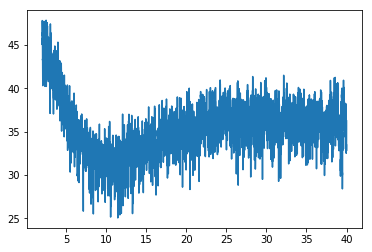

In [9]:
raw = labeled_data['nat'][13][0]
raw = raw.set_eeg_reference('average', projection=True)
raw.apply_proj()
psds, freqs = psd_multitaper(raw, fmin=2., fmax=40.)
psds = 10. * np.log10(psds)
plt.plot(freqs,psds[0])

In [198]:
psd_labeled_data = {'beat':[], 'brook': [], 'nat': []}
for game, trials in labeled_data.items():
    print(game)
    for [raw, label] in trials:
        psd = create_avgpowers(raw)
        psd_labeled_data[game].append([psd, label])

import pickle
pickle.dump(psd_labeled_data, open(data_folder+"psd_labeled_data.pkl", "wb"))

brook
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
    Using multitaper spectrum estimation with 7 DPSS windows
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
    Using multitaper spectrum estimation with 7 DPSS windows
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
    Using multita

<ipython-input-197-2c7b64c0ee1a>:3: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  raw = raw.set_eeg_reference('average', projection=True)


    Using multitaper spectrum estimation with 7 DPSS windows
Projections have already been applied. Setting proj attribute to True.


<ipython-input-197-2c7b64c0ee1a>:3: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  raw = raw.set_eeg_reference('average', projection=True)


    Using multitaper spectrum estimation with 7 DPSS windows
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
    Using multitaper spectrum estimation with 7 DPSS windows
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
    Using multitaper spectrum estimation with 7 DPSS windows
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection item

<ipython-input-197-2c7b64c0ee1a>:3: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  raw = raw.set_eeg_reference('average', projection=True)


    Using multitaper spectrum estimation with 7 DPSS windows
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
    Using multitaper spectrum estimation with 7 DPSS windows
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
    Using multitaper spectrum estimation with 7 DPSS windows
Projections have already been applied. Setting proj attribute to True.


<ipython-input-197-2c7b64c0ee1a>:3: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  raw = raw.set_eeg_reference('average', projection=True)


    Using multitaper spectrum estimation with 7 DPSS windows
Projections have already been applied. Setting proj attribute to True.


<ipython-input-197-2c7b64c0ee1a>:3: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  raw = raw.set_eeg_reference('average', projection=True)


    Using multitaper spectrum estimation with 7 DPSS windows
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
    Using multitaper spectrum estimation with 7 DPSS windows
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
    Using multitaper spectrum estimation with 7 DPSS windows
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection item

<ipython-input-197-2c7b64c0ee1a>:3: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  raw = raw.set_eeg_reference('average', projection=True)


    Using multitaper spectrum estimation with 7 DPSS windows
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
    Using multitaper spectrum estimation with 7 DPSS windows
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
    Using multitaper spectrum estimation with 7 DPSS windows
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection item

<ipython-input-197-2c7b64c0ee1a>:3: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  raw = raw.set_eeg_reference('average', projection=True)


    Using multitaper spectrum estimation with 7 DPSS windows
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
    Using multitaper spectrum estimation with 7 DPSS windows
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
    Using multitaper spectrum estimation with 7 DPSS windows
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection item

In [204]:
[X,y] = psd_labeled_data['beat'][3]

In [207]:
X

array([[72.66303709, 57.06484825, 43.75931683, 36.0237986 ],
       [54.57054073, 39.38423277, 27.31470118, 20.76881144],
       [54.58593074, 39.61109371, 28.44730706, 24.13328244],
       [54.62185971, 39.08200203, 27.34884272, 21.48816691],
       [54.62113845, 39.02873818, 26.25989457, 18.76258041],
       [54.62007398, 39.31383432, 27.53653111, 21.94933411],
       [54.66078006, 39.10430365, 27.97653976, 23.39324744],
       [54.69571305, 39.21006033, 27.48467312, 21.88886345],
       [54.67696596, 39.34046294, 28.0547913 , 23.34644935]])

In [211]:
X.flatten()

array([72.66303709, 54.57054073, 54.58593074, 54.62185971, 54.62113845,
       54.62007398, 54.66078006, 54.69571305, 54.67696596, 57.06484825,
       39.38423277, 39.61109371, 39.08200203, 39.02873818, 39.31383432,
       39.10430365, 39.21006033, 39.34046294, 43.75931683, 27.31470118,
       28.44730706, 27.34884272, 26.25989457, 27.53653111, 27.97653976,
       27.48467312, 28.0547913 , 36.0237986 , 20.76881144, 24.13328244,
       21.48816691, 18.76258041, 21.94933411, 23.39324744, 21.88886345,
       23.34644935])

### Visualize a trial

In [3]:
import matplotlib.pyplot as plt
import plotly.offline as offline
import plotly.plotly as py
from plotly import tools
from plotly.graph_objs import Layout, YAxis, Scattergl, Annotation, Annotations, Data, Figure, Marker, Font
def visualize_trial(raw, title, start=None, stop=None, lfreq=None, hfreq=None, ch_names=channel_names, apply_proj=False):
    """
    Draw a trial using plotly
    Arguments:
        raw: mne raw data object
        start: start second
        end: end second
        lfreq: lowfreq filter
        hfreq: high freq filter
        ch_names: name of channels used for plotting
        apply_proj: bool applies an average subtraction filter
    """
    
    if apply_proj:
        raw = raw.set_eeg_reference('average', projection=True)
        raw.apply_proj()
    if start and stop:
        start, stop = raw.time_as_index([start, stop])
        data, times = raw[:, start:stop]
    else:
        data, times = raw[:, :]
    if lfreq and hfreq:
        raw.filter(lfreq, hfreq, n_jobs=-1)
        
    n_channels = raw.get_data().shape[0]
    step = 1. / n_channels
    kwargs = dict(domain=[1 - step, 1], showticklabels=False, zeroline=False, showgrid=False)

    # create objects for layout and traces
    layout = Layout(yaxis=YAxis(kwargs), showlegend=False, title = title, template='plotly_dark')
    traces = [Scattergl(x=times, y=data.T[:, 0])]

    # loop over the channels
    for ii in range(1, n_channels):
            kwargs.update(domain=[1 - (ii + 1) * step, 1 - ii * step])
            layout.update({'yaxis%d' % (ii + 1): YAxis(kwargs), 'showlegend': False})
            traces.append(Scattergl(x=times, y=data.T[:, ii], yaxis='y%d' % (ii + 1)))

    # add channel names using Annotations
    annotations = Annotations([Annotation(x=-0.06, y=0, xref='paper', yref='y%d' % (ii + 1),
                                          text=ch_name, font=Font(size=9), showarrow=False)
                              for ii, ch_name in enumerate(ch_names)])
    layout.update(annotations=annotations)

    # set the size of the figure and plot it
    layout.update(autosize=False, width=1000, height=600)
    fig = Figure(data=Data(traces), layout=layout)
    return fig

### Visualize one trial

In [6]:
event_name, trial_id = 'brook', 8
raw = labeled_data[event_name][trial_id][0]
fig = visualize_trial(raw, title='test', start=1, stop=10, lfreq=10, hfreq=50, apply_proj=True)
py.iplot(fig, filename='shared xaxis') # inline plot

Projections have already been applied. Setting proj attribute to True.
Setting up band-pass filter from 10 - 50 Hz
l_trans_bandwidth chosen to be 2.5 Hz
h_trans_bandwidth chosen to be 12.5 Hz
Filter length of 677 samples (1.322 sec) selected


<ipython-input-3-1b79705063f5>:20: RuntimeWarning:

An average reference projection was already added. The data has been left untouched.

[Parallel(n_jobs=4)]: Done   4 out of   9 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=4)]: Done   6 out of   9 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   9 out of   9 | elapsed:    0.2s finished
/Users/Ajit/anaconda/lib/python3.5/site-packages/plotly/graph_objs/_deprecations.py:558: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis


/Users/Ajit/anaconda/lib/python3.5/site-packages/plotly/graph_objs/_deprecations.py:318: DeprecationWarning:

plotly.graph_objs.Font is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Font
  - plotly.graph_objs.layout.hoverlabel.Font
  - etc.


/Users/Ajit/anaconda/lib/python3.5/site

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~ajpa94/0 or inside your plot.ly account where it is named 'shared xaxis'


### Create html plot for each game considering all trials

In [7]:
html_start_str = "<html >\
    <head><script src=\"https://cdn.plot.ly/plotly-latest.min.js\"></script></head>\n\
    <body>"
trials_text = {'nat': html_start_str, 'beat': html_start_str, 'brook': html_start_str}
for event, trials in labeled_data.items():
    for it, trial in enumerate(trials):
        title = '{} Trial: {}, valence: {}, arousal: {}'.format(event, it, trial[1][0], trial[1][1])
        raw = trial[0]
        fig = visualize_trial(raw, title=title)
        e = offline.plot(fig, include_plotlyjs=False, output_type='div')
        offline.plot(fig, filename=single_trial_folder+"{}-{}.html".format(event, it))
#         py.iplot(fig, filename='shared xaxis') # inline plot
        trials_text[event] += e
        trials_text[event] += '\n\n'

for k in trials_text.keys():
    trials_text[k] += '  </body>\n </html>'    
    fh = open(events_plot_folder +"{}-all-trials.html".format(k), "w")
    fh.write(trials_text[k])
    fh.close()

/Users/Ajit/anaconda/lib/python3.5/site-packages/plotly/graph_objs/_deprecations.py:558: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis


/Users/Ajit/anaconda/lib/python3.5/site-packages/plotly/graph_objs/_deprecations.py:318: DeprecationWarning:

plotly.graph_objs.Font is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Font
  - plotly.graph_objs.layout.hoverlabel.Font
  - etc.


/Users/Ajit/anaconda/lib/python3.5/site-packages/plotly/graph_objs/_deprecations.py:144: DeprecationWarning:

plotly.graph_objs.Annotation is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Annotation
  - plotly.graph_objs.layout.scene.Annotation


/Users/Ajit/anaconda/lib/python3.5/site-packages/plotly/graph_objs/_deprecations.py:66: DeprecationWa

### Create html plot for each participant complete experiment

In [8]:
trials = [1,2,3,6,7,8,9,10,11,12,13,14,15,16]
# trial_paths = [join(csv_data_path, f) for f in listdir(csv_data_path) if
#                             isfile(join(csv_data_path, f)) and f.endswith(".csv")]
trial_data = {}
info = mne.create_info(ch_names=channel_names, sfreq=sfreq, ch_types="eeg")
for t in trials:
    if isfile(csv_data_path.format(t)):
        data = np.loadtxt(csv_data_path.format(t), delimiter=',')
        title = 'Trial: {}'.format(t)
        raw = mne.io.RawArray(data, info)
        fig = visualize_trial(raw, title=title)
        offline.plot(fig, filename=complete_plot_folder+"trial-{}.html".format(t))
        #         py.iplot(fig, filename='shared xaxis')

Creating RawArray with float64 data, n_channels=9, n_times=783690
    Range : 0 ... 783689 =      0.000 ...  1530.643 secs
Ready.


/Users/Ajit/anaconda/lib/python3.5/site-packages/plotly/graph_objs/_deprecations.py:558: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis


/Users/Ajit/anaconda/lib/python3.5/site-packages/plotly/graph_objs/_deprecations.py:318: DeprecationWarning:

plotly.graph_objs.Font is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Font
  - plotly.graph_objs.layout.hoverlabel.Font
  - etc.


/Users/Ajit/anaconda/lib/python3.5/site-packages/plotly/graph_objs/_deprecations.py:144: DeprecationWarning:

plotly.graph_objs.Annotation is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Annotation
  - plotly.graph_objs.layout.scene.Annotation


/Users/Ajit/anaconda/lib/python3.5/site-packages/plotly/graph_objs/_deprecations.py:66: DeprecationWa

Creating RawArray with float64 data, n_channels=9, n_times=937240
    Range : 0 ... 937239 =      0.000 ...  1830.545 secs
Ready.
Creating RawArray with float64 data, n_channels=9, n_times=822810
    Range : 0 ... 822809 =      0.000 ...  1607.049 secs
Ready.
Creating RawArray with float64 data, n_channels=9, n_times=1275210
    Range : 0 ... 1275209 =      0.000 ...  2490.643 secs
Ready.
Creating RawArray with float64 data, n_channels=9, n_times=801020
    Range : 0 ... 801019 =      0.000 ...  1564.490 secs
Ready.
Creating RawArray with float64 data, n_channels=9, n_times=862590
    Range : 0 ... 862589 =      0.000 ...  1684.744 secs
Ready.
Creating RawArray with float64 data, n_channels=9, n_times=1062180
    Range : 0 ... 1062179 =      0.000 ...  2074.568 secs
Ready.
Creating RawArray with float64 data, n_channels=9, n_times=1005120
    Range : 0 ... 1005119 =      0.000 ...  1963.123 secs
Ready.
Creating RawArray with float64 data, n_channels=9, n_times=745260
    Range : 0 ... 